# Parsing datetime data

In [124]:
import pandas as pd

In [125]:
df = pd.read_csv("./data/landslides.csv")
df.head()

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,NaN
1,42,3/22/07,NaN,United States,Ohio,17288,Landslide,Rain,NaN
2,56,4/6/07,NaN,United States,Pennsylvania,15930,Landslide,Rain,NaN
3,59,4/14/07,NaN,Canada,Quebec,42786,Riverbank collapse,Rain,NaN
4,61,4/15/07,NaN,United States,Kentucky,6903,Landslide,Downpour,0.0


## Check and handle missing values

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1693 non-null   int64  
 1   date            1690 non-null   object 
 2   time            629 non-null    object 
 3   country_name    1693 non-null   object 
 4   state/province  1692 non-null   object 
 5   population      1693 non-null   int64  
 6   landslide_type  1692 non-null   object 
 7   trigger         1691 non-null   object 
 8   fatalities      1446 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 119.2+ KB


In [127]:
df.isna().sum()

id                   0
date                 3
time              1064
country_name         0
state/province       1
population           0
landslide_type       1
trigger              2
fatalities         247
dtype: int64

In [128]:
df = df[~df['date'].isnull()]

In [129]:
df

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,NaN
1,42,3/22/07,NaN,United States,Ohio,17288,Landslide,Rain,NaN
2,56,4/6/07,NaN,United States,Pennsylvania,15930,Landslide,Rain,NaN
3,59,4/14/07,NaN,Canada,Quebec,42786,Riverbank collapse,Rain,NaN
4,61,4/15/07,NaN,United States,Kentucky,6903,Landslide,Downpour,0.0
...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,NaN,United States,North Carolina,1646,Rockfall,NaN,0.0
1689,7537,2/22/16,0:00,United States,West Virginia,51400,Mudslide,Unknown,0.0
1690,7539,2/23/16,NaN,United States,West Virginia,2406,Landslide,Rain,0.0
1691,7540,2/26/16,21:06,United States,West Virginia,1048,Rockfall,Unknown,0.0


In [130]:
df['time'].value_counts()

time
Night            97
Morning          87
Afternoon        58
Early morning    36
3:00:00          12
                 ..
1:13              1
9:40:00           1
11:50:00          1
                  1
21:06             1
Name: count, Length: 159, dtype: int64

In [131]:
df['time'].isna().sum()

np.int64(1064)

In [132]:
df['time'] = df['time'].fillna("Not Known")
df

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,NaN
1,42,3/22/07,Not Known,United States,Ohio,17288,Landslide,Rain,NaN
2,56,4/6/07,Not Known,United States,Pennsylvania,15930,Landslide,Rain,NaN
3,59,4/14/07,Not Known,Canada,Quebec,42786,Riverbank collapse,Rain,NaN
4,61,4/15/07,Not Known,United States,Kentucky,6903,Landslide,Downpour,0.0
...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,Not Known,United States,North Carolina,1646,Rockfall,NaN,0.0
1689,7537,2/22/16,0:00,United States,West Virginia,51400,Mudslide,Unknown,0.0
1690,7539,2/23/16,Not Known,United States,West Virginia,2406,Landslide,Rain,0.0
1691,7540,2/26/16,21:06,United States,West Virginia,1048,Rockfall,Unknown,0.0


In [133]:
df['time'].isna().sum()

np.int64(0)

In [134]:
mean = df['fatalities'].mean()
mean

np.float64(1.4622314622314623)

In [135]:
df['fatalities'] = df['fatalities'].fillna(mean)
df

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,1.462231
1,42,3/22/07,Not Known,United States,Ohio,17288,Landslide,Rain,1.462231
2,56,4/6/07,Not Known,United States,Pennsylvania,15930,Landslide,Rain,1.462231
3,59,4/14/07,Not Known,Canada,Quebec,42786,Riverbank collapse,Rain,1.462231
4,61,4/15/07,Not Known,United States,Kentucky,6903,Landslide,Downpour,0.000000
...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,Not Known,United States,North Carolina,1646,Rockfall,NaN,0.000000
1689,7537,2/22/16,0:00,United States,West Virginia,51400,Mudslide,Unknown,0.000000
1690,7539,2/23/16,Not Known,United States,West Virginia,2406,Landslide,Rain,0.000000
1691,7540,2/26/16,21:06,United States,West Virginia,1048,Rockfall,Unknown,0.000000


In [136]:
df['fatalities'].isna().sum()

np.int64(0)

## Date time parsing using .to_datetime()

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1690 entries, 0 to 1692
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1690 non-null   int64  
 1   date            1690 non-null   object 
 2   time            1690 non-null   object 
 3   country_name    1690 non-null   object 
 4   state/province  1689 non-null   object 
 5   population      1690 non-null   int64  
 6   landslide_type  1689 non-null   object 
 7   trigger         1688 non-null   object 
 8   fatalities      1690 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 132.0+ KB


In [138]:
df['date']

0        3/2/07
1       3/22/07
2        4/6/07
3       4/14/07
4       4/15/07
         ...   
1688    12/7/15
1689    2/22/16
1690    2/23/16
1691    2/26/16
1692     3/2/16
Name: date, Length: 1690, dtype: object

In [139]:
df['parsed_date'] = pd.to_datetime(df['date'], format="%m/%d/%y")
df['parsed_date']

0      2007-03-02
1      2007-03-22
2      2007-04-06
3      2007-04-14
4      2007-04-15
          ...    
1688   2015-12-07
1689   2016-02-22
1690   2016-02-23
1691   2016-02-26
1692   2016-03-02
Name: parsed_date, Length: 1690, dtype: datetime64[ns]

In [140]:
month_of_lslide = df['parsed_date'].dt.month
month_of_lslide

0        3
1        3
2        4
3        4
4        4
        ..
1688    12
1689     2
1690     2
1691     2
1692     3
Name: parsed_date, Length: 1690, dtype: int32

/var/folders/n7/fvkdhhrx3p1dnmvdr5f9mv6h0000gp/T/ipykernel_36325/4287812100.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(month_of_lslide, kde=False, bins=12)


<Axes: xlabel='parsed_date'>

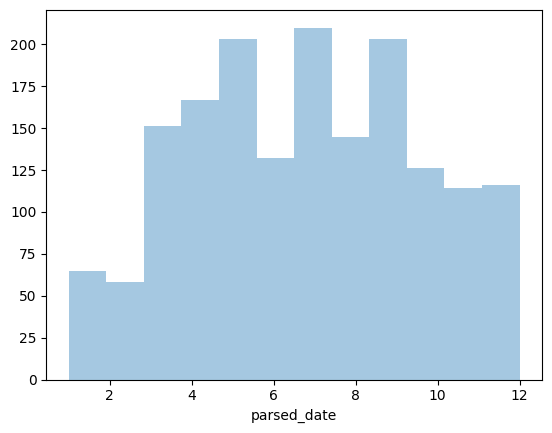

In [141]:
import seaborn as sns

month_of_lslide = month_of_lslide.dropna()
sns.distplot(month_of_lslide, kde=False, bins=12)

## Correcting the data format

In [142]:
df['time'].value_counts().sort_values(ascending=False).reset_index()

,time,count
0,Not Known,1064
1,Night,97
2,Morning,87
3,Afternoon,58
4,Early morning,36
...,...,...
155,5:45,1
156,13:50,1
157,13:30,1
158,15:20,1


In [143]:
def classify_time(time_str):
    # Handle missing values
    if pd.isna(time_str):
        return "Not known"
    
    # Standardize the input
    time_str = time_str.strip().lower()
    
    # Check for descriptive keywords first
    if "morning" in time_str:
        return "Morning"
    elif "afternoon" in time_str:
        return "Afternoon"
    elif "evening" in time_str:
        return "Evening"
    elif "night" in time_str:
        return "Night"
    
    # If the string contains a colon, try parsing as a time using multiple formats
    if ":" in time_str:
        # List of possible time formats
        time_formats = ["%H:%M", "%H:%M:%S", "%H:%M:%S.%f"]
        for fmt in time_formats:
            try:
                t = datetime.strptime(time_str, fmt)
                hour = t.hour
                # Define time ranges
                if 5 <= hour < 12:
                    return "Morning"
                elif 12 <= hour < 17:
                    return "Afternoon"
                elif 17 <= hour < 21:
                    return "Evening"
                else:
                    return "Night"
            except ValueError:
                continue
        return "Not known"
    
    # Fallback for any other unhandled cases
    return "Not known"

In [144]:
df['time_cleaned']= df.time.apply(lambda x: classify_time(x))

In [145]:
df['time_cleaned'].value_counts()

time_cleaned
Not known    1068
Night         214
Morning       199
Afternoon     134
Evening        75
Name: count, dtype: int64